### Data Description
There were 1535 observations made in the sessions dataset meaning there was a total of 1535 sessions played. 
There are five varibles in sessions.csv: 
- hashedEmail: chr
    - Serves as a player identifyer between both datasets
    - The email with the most sessions played had a total of 310 sessions
- start_time: chr
    - String representaion of start time
- end_time: chr
    - String representaion of end time
- original_start_time: dbl
    - Number representation of start time
- original_end_time: dbl
    - Number representation of end time
    - The longest single session was four hours long

There were 196 observations in the players dataset meaning there was 196 unique players. 
In players.csv there seven varibles: 
- experience: chr
    - A catagorical varible denoting the experience level of the player
    - 63 players were Amateurs, 48 were Veterans, 36 were Regular, 35 were Beginners, and 14 were pros
- subscribe: lgl
    - A boolean value representing whether or not a player subscribed
    - Most players subscribed with 144 subscribing, and 52 not subscribing
- hashedEmail: chr
    - As previously mentioned: a unique identifyer given to each player to track sessions
- played_hours: dbl
    - Total hours played by each player
    - Most hours played was 223.1 while the least was 0
- name: chr
    - The name of the player
- gender: chr
    - The players gender
    - 124 Males, 37 Females, 15 Non-Binary, 11 Perfer not to say, 6 Two-Spirited, 2 Agender, and 1 Other
- age: dbl
    - The players age
    - The oldest player was 58 and the youngest was 9

I dont directly see any major issues in the data. 
- The name column in players.csv is somewhat irrelavent as majority of the names are unique and that isnt representative of anything. It would be good to move the hashedEmail column to the first position in the dataset for readability. 
- Sessions.csv also has both a string and number representation of start and end times. A better representation would be to keep the string columns for start and end, and replace the number columns with a single column representing the total session time. This makes me belive it is raw data collected from the database as the number timestamps would be what was outputted automatically, and then reformatted as a string.
- Im not entirley sure what the subscribe column means in players

### Question
My question is: can played_hours and Age predict exerience in players.csv?
The data is already formatted in such a way that each player (with the exception of the last row) has an experience level, an amount of hours played, and an age. This will reduce the amount of wrangling to just removing the last row as thier age is NA. 

### Exploratory Data Analysis and Visualization

In [ ]:
# Loading libraries and datasets into R
library("tidyverse")
library("tidymodels")
players = read_csv("data/players.csv")
sessions = read_csv("data/sessions.csv")

In [ ]:
# Minimum necassary wrangling: removing rows with NA age
players = players[!is.na(players$Age),]

In [ ]:
# Mean value for each quantitative varible in players.csv
mean_vals_table = players|>
    select(played_hours, Age)|>
    map_df(mean)
mean_vals_table

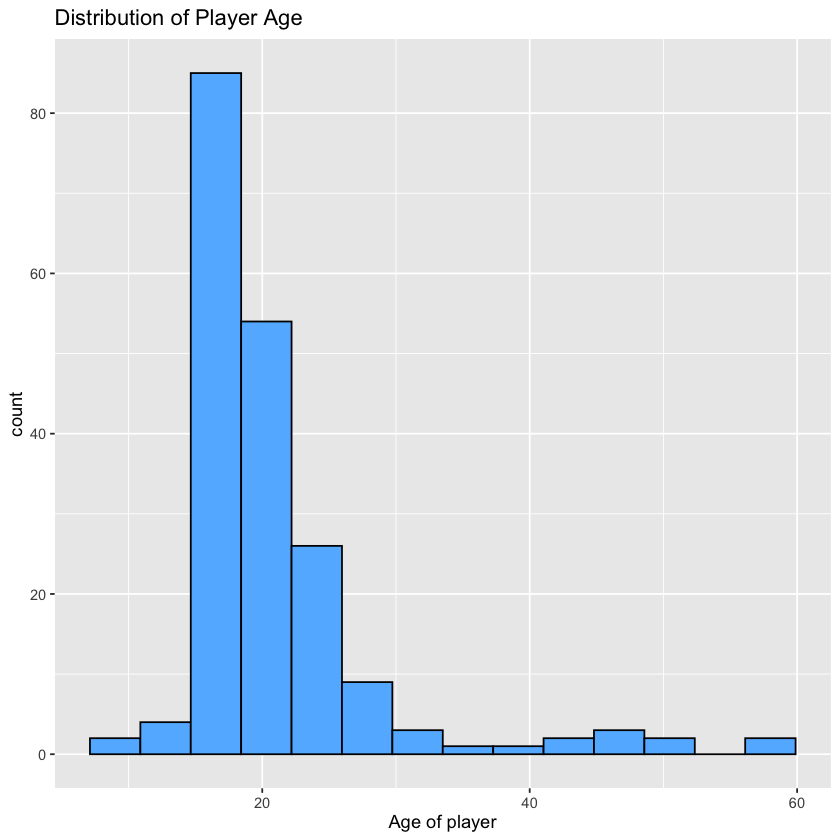

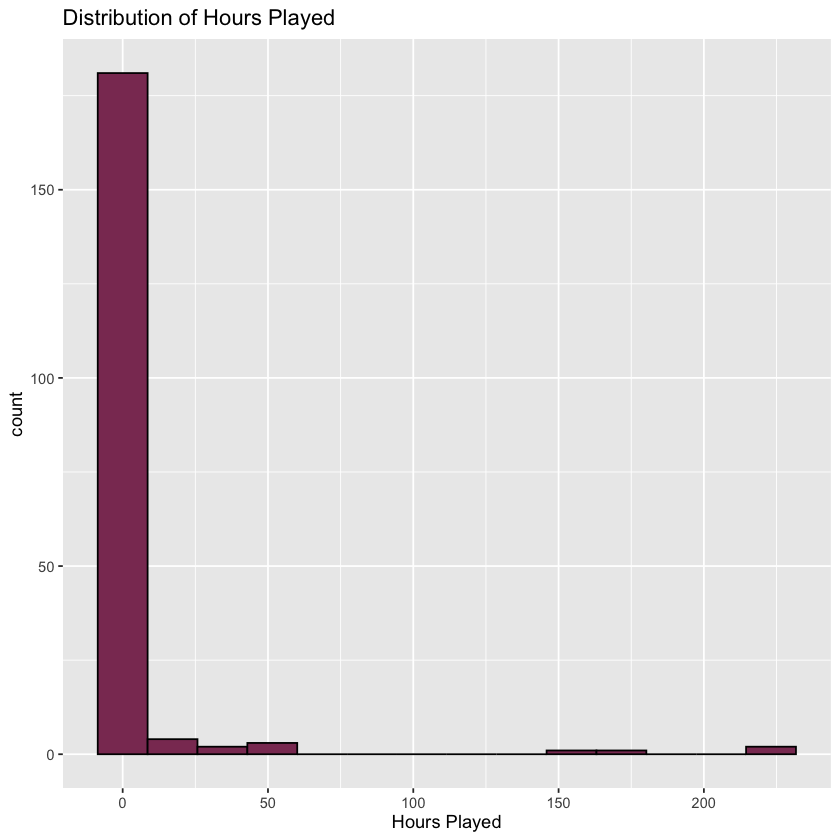

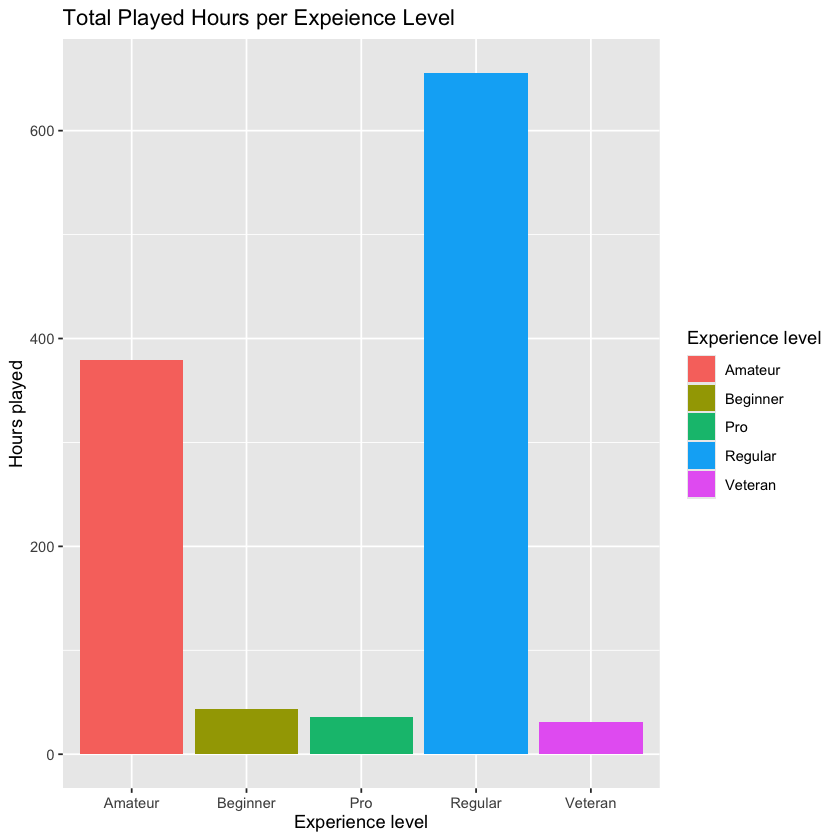

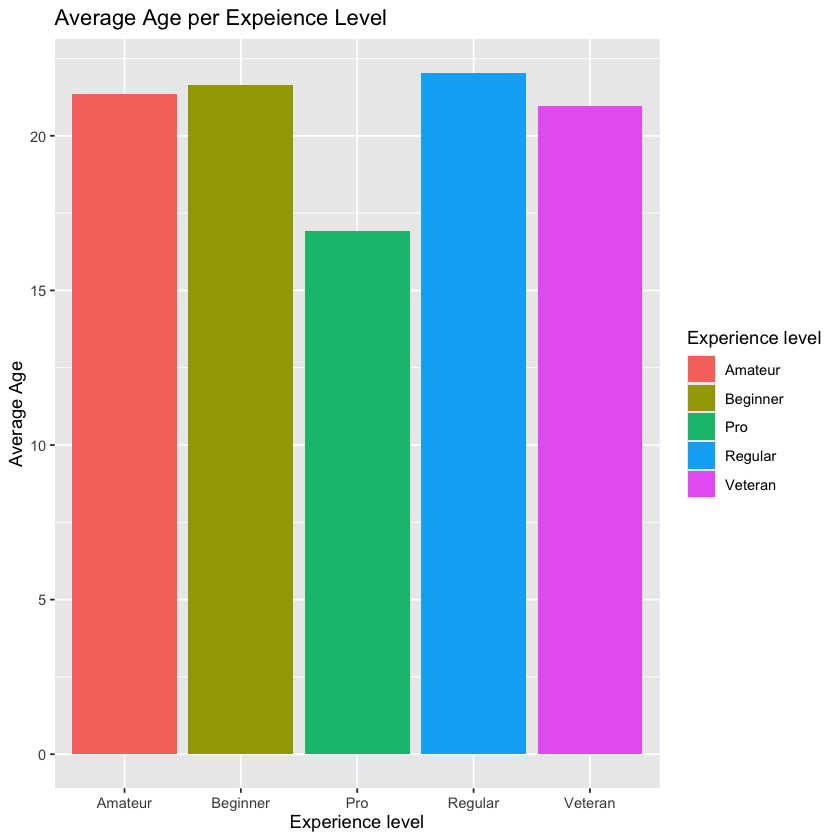

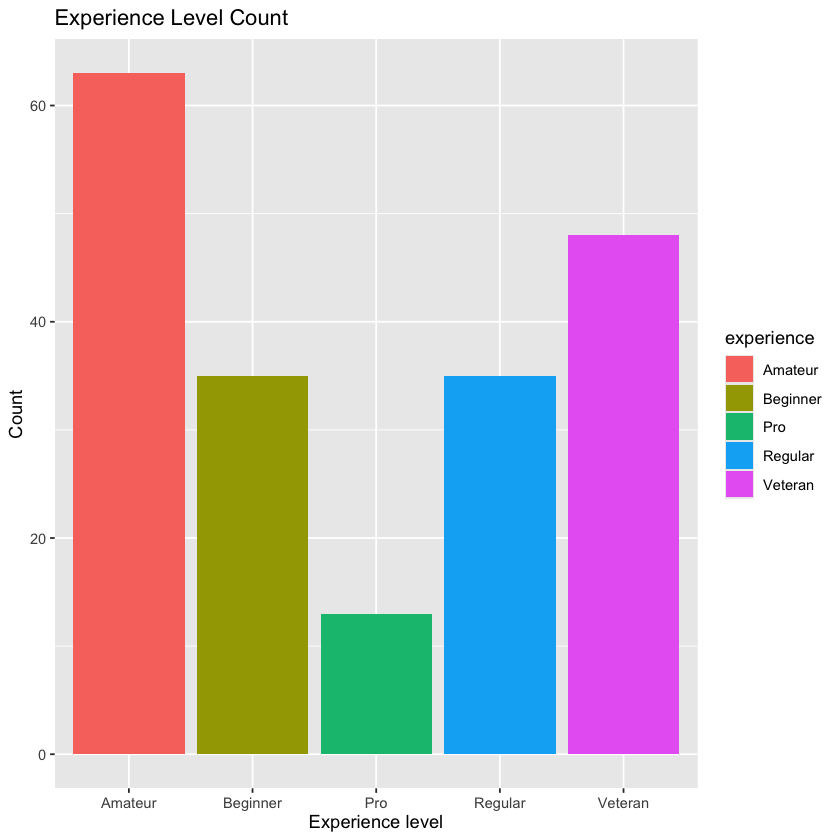

In [105]:
# Explanatory visualizations
NUMBINS = round(sqrt(nrow(players)))

age_hist = players|>
    ggplot(aes(x = Age))+
        geom_histogram(fill="steelblue1", col = "black",bins = NUMBINS)+
        labs(title = "Distribution of Player Age", x = "Age of player")

hours_hist = players|>
    ggplot(aes(x = played_hours))+
        geom_histogram(fill="hotpink4", col = "black",bins = NUMBINS)+
        labs(title = "Distribution of Hours Played", x = "Hours Played")

experience_hours = players|>
    group_by(experience)|>
    summarise(hours=sum(played_hours))|>
    ggplot(aes(x = experience, y = hours, fill = experience))+
        geom_bar(stat = "identity")+
        labs(title = "Total Played Hours per Expeience Level", x = "Experience level", y = "Hours played", fill = "Experience level")

experience_age = players|>
    group_by(experience)|>
    summarise(Age=mean(Age))|>
    ggplot(aes(x = experience, y = Age, fill = experience))+
        geom_bar(stat = "identity")+
        labs(title = "Average Age per Expeience Level", x = "Experience level", y = "Average Age", fill = "Experience level")

players_experience = players|>
    ggplot(aes(x=experience, fill=experience))+
        geom_bar()+
        labs(title = "Experience Level Count", x = "Experience level", y = "Count")

age_hist
hours_hist
experience_hours
experience_age
players_experience


- The distribution of player ages tells me that majority of players are younger, falling around the 16-20 mark.
- The distribution of hours played shows that majority of players did not play the game very much at all. I may have to account for that in the prediction
- We see that players with the "Regular" experience level played the most
- The average age for each experience group falls around 20 with the exception of Pros which are around 16-17
- Amateurs appear much more which may skew my prediction accuracy, especially when trying to predect a Pro